In [2]:
# Add DEVENV_PATH to the path so that we can import the modules
import sys
from os import getenv
import numpy as np
sys.path.append(getenv("DEVENV_ROOT"))

import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns
import greenflow.analysis as an
from entrypoint import load_gin
from greenflow.utils import convert_to_mib
import pendulum

cutoff = "2024-12-16T03:15:35.626996+01:00"
cutoff_end = "2025-01-13T03:15:35.626996+01:00"

load_gin(exp_name="ingest-kafka", test=False)
cutoff_end = pendulum.now().to_iso8601_string()


[WARNING]: failed to patch stdout/stderr for fork-safety: 'OutStream' object
has no attribute 'buffer'
[WARNING]: failed to reconfigure stdout/stderr with the replace error handler:
'OutStream' object has no attribute 'reconfigure'


In [3]:
import matplotlib.pyplot as plt

def safety_analysis(data):
    # Function to create the graph for a specific system
    def _safety(data, system_name):
        import seaborn as sns
        import matplotlib.pyplot as plt

        # Assuming df is your DataFrame with 'message_size' and 'throughput_mbps' columns
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='messageSize', y='throughput_MBps', data=data)

        plt.title(f'Message Size vs Throughput Distribution for {system_name}')
        plt.xlabel('Message Size (bytes)')
        plt.ylabel('Throughput (MBps)')

        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45)

        # Adjust layout to prevent label cutoff
        plt.tight_layout()
        plt.show()
    

    kafka_last_points = _safety(data[data["exp_name"] == "ingest-kafka"], "Kafka")
    redpanda_last_points = _safety(data[data["exp_name"] == "ingest-redpanda"], "Redpanda")
    _safety


In [ ]:
common = dict(type="safetyCurve", cutoff_begin=cutoff, cutoff_end=cutoff_end, partitions=1)
# ovhnvme_1 = an.full_analytical_pipeline(cluster="ovhnvme", **common)
# ovhnvme_1 = an.full_analytical_pipeline(cluster="ovhnvme", **common)
taurus_1 = an.full_analytical_pipeline(cluster="taurus", **common)

In [5]:
# common = dict(type="safetyCurve", cutoff_begin=cutoff, cutoff_end=cutoff_end, partitions=1)
# grappe_1 = an.full_analytical_pipeline_nocache(cluster="grappe", **common)
# ovhnvme_1 = an.full_analytical_pipeline_nocache(cluster="ovhnvme", **common)
# taurus_1 = an.full_analytical_pipeline_nocache(cluster="taurus", **common)
# an.create_qgrid_widget(ovhnvme_1)

In [6]:
# safety_analysis(ovhnvme_1)

In [7]:
grappe_1 = an.full_analytical_pipeline(cluster="grappe", **common)

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

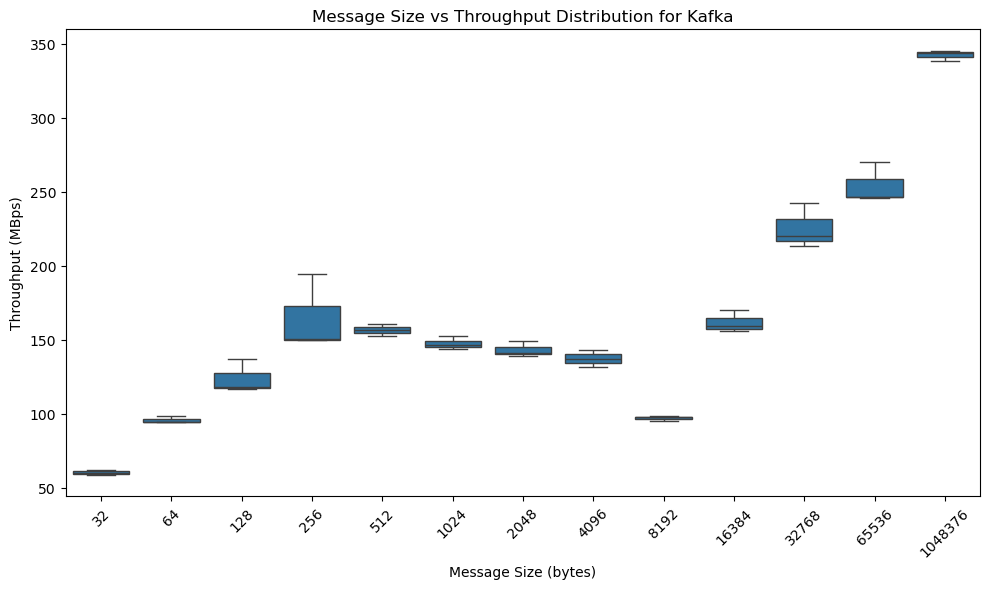

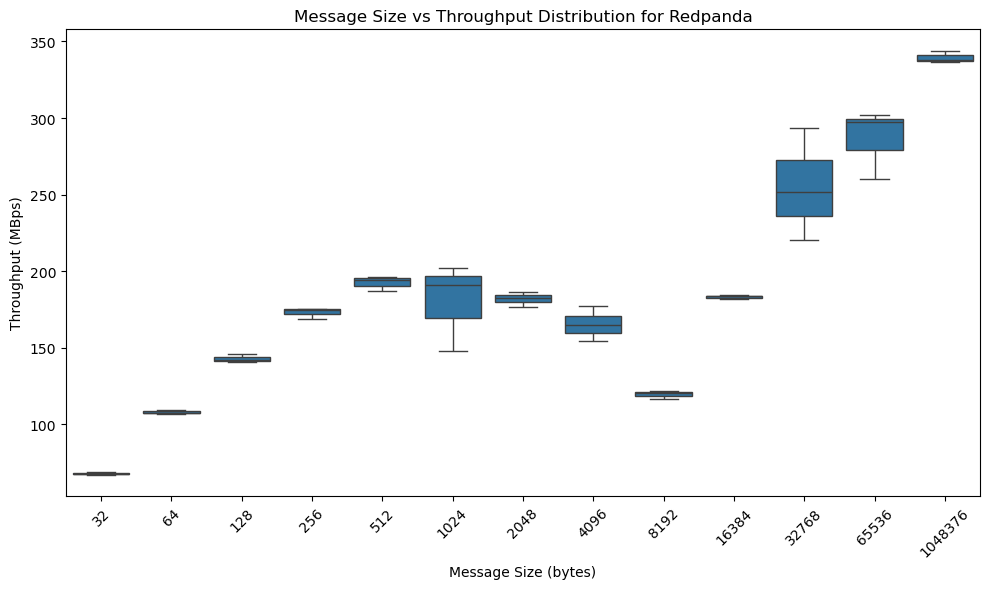

In [8]:
safety_analysis(grappe_1)

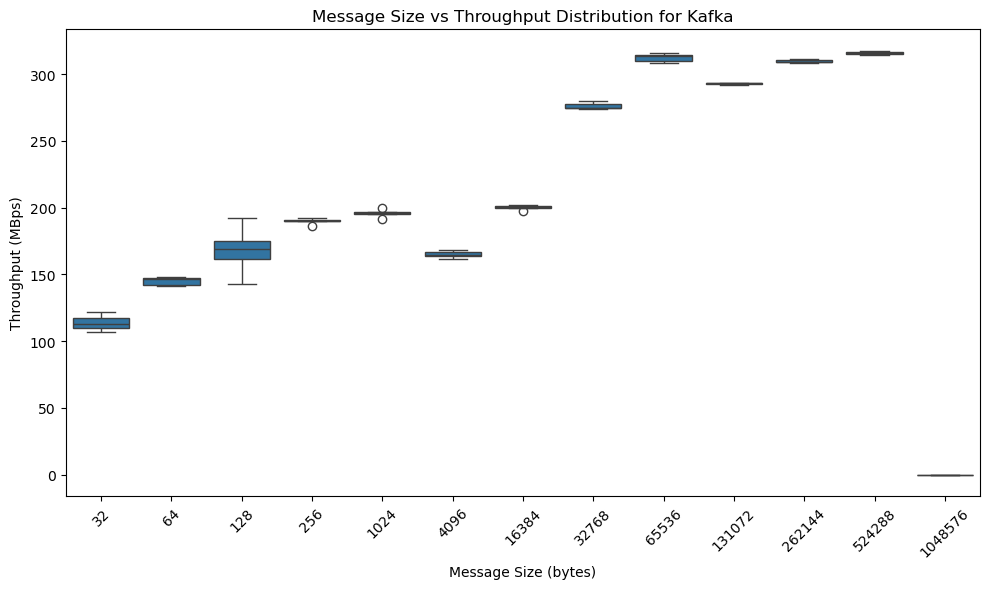

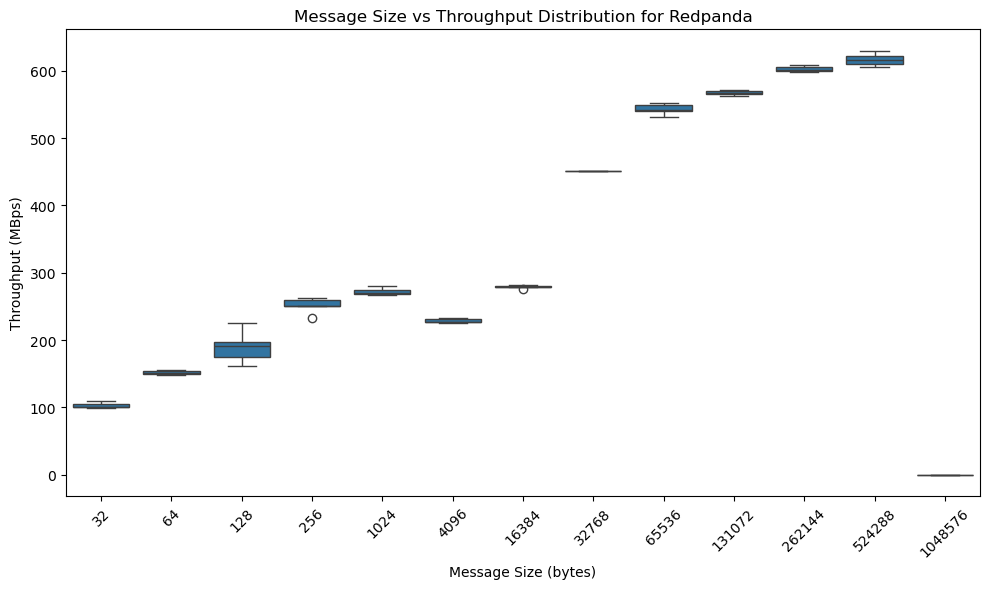

In [9]:
safety_analysis(ovhnvme_1)

In [12]:
grappe_1 = an.full_analytical_pipeline(cluster="grappe", **common)

KeyError: "None of ['exp_id'] are in the columns"

In [ ]:
safety_analysis(grappe_1)

In [32]:
# safety_analysis(taurus_1)